In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

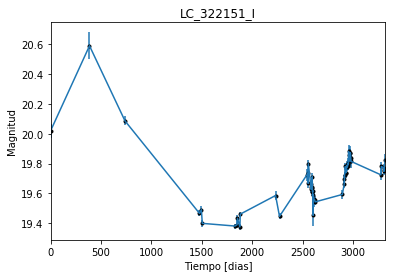

In [2]:
data = np.genfromtxt('LC_322151_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_322151_I')
plt.savefig("LC_322151_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

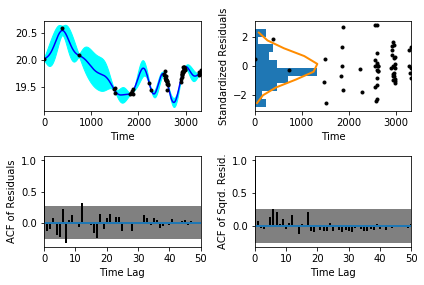

In [5]:
sample.assess_fit()

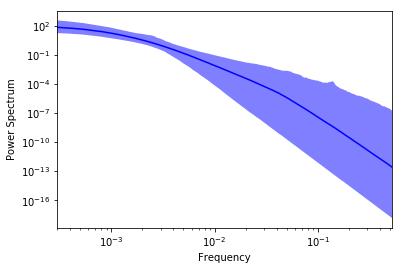

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

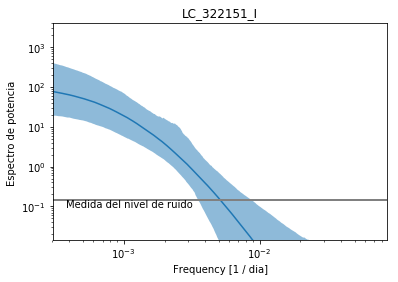

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_322151_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_322151_I')

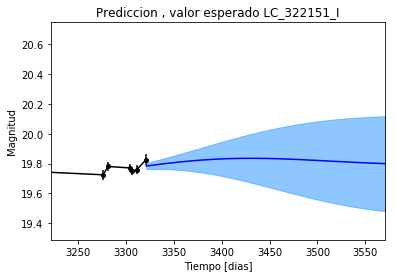

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_322151_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_322151_I')

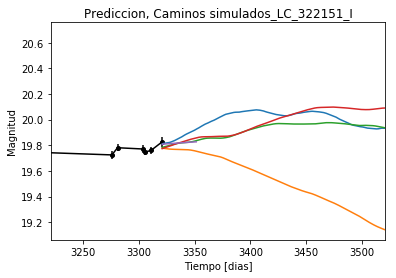

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_322151_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


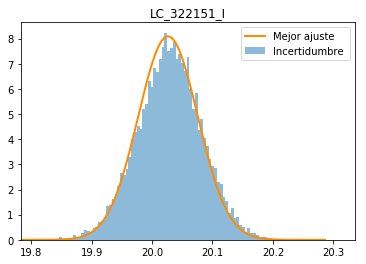

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_322151_I')
plt.savefig("Mejor_ajuste_LC_322151_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_322151_I')

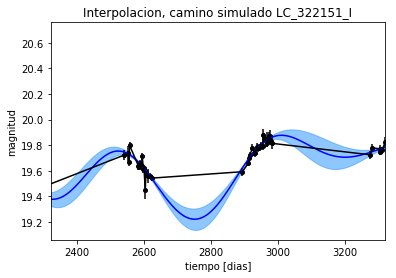

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_322151_I')

Text(0.5,1,'Interpolacion, camino simulado LC_322151_I')

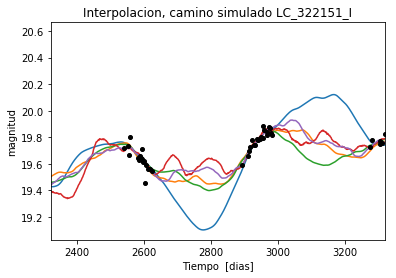

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_322151_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1208.15690135
Median: 0.010015172945
Standard deviation: 0.204921382051
68% credibility interval: [ 0.00095655  0.20283531]
95% credibility interval: [  3.57457623e-04   7.94470954e-01]
99% credibility interval: [  3.18161127e-04   9.92182420e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 485.610673999
Median: 0.00142910567358
Standard deviation: 0.0704759837368
68% credibility interval: [ 0.0004727   0.01383767]
95% credibility interval: [ 0.00032393  0.20715625]
99% credibility interval: [  3.07052138e-04   5.08885619e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 666.651757883
Median: 0.0115409057765
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1070.39730661
Median: 94.0190633796
Standard deviation: 1.67489456433
68% credibility interval: [ 92.16993588  95.24049959]
95% credibility interval: [ 89.64736494  96.2193712 ]
99% credibility interval: [ 87.79007935  97.38887895]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 607.443764902
Median: 0.505754344996
Standard deviation: 2.05232522378
68% credibility interval: [ 0.04870773  3.53910513]
95% credibility interval: [ 0.012823    6.81634132]
99% credibility interval: [ 0.01041842  9.52071365]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 689.64257917
Median: 0.159460433558
Standard deviation: 6.70281354759
68% credibility interval: [ 0.00585772  3.46212056]
95% credibility interval: [  5.04959315e-04

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 19393.4570389
Median: 2.52977089551e-38
Standard deviation: 3.88184457259e+84
68% credibility interval: [  7.96179260e-81   2.59749220e-14]
95% credibility interval: [  1.51659031e-130   3.60880083e-002]
99% credibility interval: [  3.11588768e-153   3.69376410e+001]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2822.67913263
Median: 19.7890031038
Standard deviation: 0.201300150042
68% credibility interval: [ 19.62225541  19.97580008]
95% credibility interval: [ 19.40501829  20.20375471]
99% credibility interval: [ 19.17517677  20.44399386]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 579.594489601
Median: 0.00175781953683
Standard deviation: 0.189462631346
68% credibility interval: [ 0.          0.15749274]
95% credibility interval: [ 0.          0.74324926]
99% credibility interval: [ 0.          0.95133182]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 579.594489601
Median: 0.00175781953683
Standard deviation: 0.189462631346
68% credibility interval: [ 0.          0.15749274]
95% credibility interval: [ 0.          0.74324926]
99% credibility interval: [ 0.          0.95133182]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 379.448590932
Median: 0.0
Standard deviation: 0.000356704598287
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1070.39730661
Median: 94.0190633796
Standard deviation: 1.67489456433
68% credibility interval: [ 92.16993588  95.24049959]
95% credibility interval: [ 89.64736494  96.2193712 ]
99% credibility interval: [ 87.79007935  97.38887895]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2948.22738444
Median: 0.146826248379
Standard deviation: 0.173100077659
68% credibility interval: [ 0.08471554  0.28137245]
95% credibility interval: [ 0.05259848  0.61312178]
99% credibility interval: [ 0.04144902  1.09900356]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1576.76214884
Median: 1.2867679508
Standard deviation: 0.206256488673
68% credibility interval: [ 1.10638982  1.50197103]
95% credibility interval: [ 0.92354089  1.75076601]
99% credibility interval: [ 0.79013028  1.90184023]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1119.56855214
Median: 6.63833561982e-05
Standard deviation: 0.0476356158946
68% credibility interval: [  2.01484848e-06   2.21503919e-03]
95% credibility interval: [  1.10271229e-07   3.16850606e-02]
99% credibility interval: [  3.89223964e-08   2.47587980e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1208.15690135
Median: (-0.0629271874968-1.30244583651j)
Standard deviation: 1.75354754739
68% credibility interval: [-1.27445183-1.17893195j -0.00601018-0.19199543j]
95% credibility interval: [ -4.99180823e+00+0.j          -2.24597248e-03-0.11587722j]
99% credibility interval: [ -6.23406600e+00+0.j          -1.99906532e-03-0.01697607j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 485.610673999
Median: (-0.00897933577066+1.54354121532j)
Standard deviation: 1.27011996343
68% credibility interval: [-0.08694462+0.18643912j -0.00297003+0.15693996j]
95% credibility interval: [-1.30160114+3.20820447j -0.00203533+0.j        ]
99% credibility interval: [ -3.19742264e+00+2.61118223j  -1.92926548e-03+0.j        ]
Posterior sum